Pytorch的原理：  


### 1.1

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("PyTorch Version:", torch.__version__)

PyTorch Version: 2.7.1+cu118


In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

在区间 [−4.0,4.0] 内，每隔 0.01 取一个点  
X 和 Y 的二维坐标矩阵  
X 网格中每个点的 x 坐标  
Y 网格中每个点的 y 坐标  
defined two grids of x-values and y-values with positions or coordinates坐标 from -4.0 to 4.0 at interval of 0.01  

In [5]:
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

convert the Numpy arrays to PyTorch tensors  
potential inputs to the graph  

In [6]:
# transfer to the GPU device
x = x.to(device)
y = y.to(device)

In [7]:
# Compute Gaussian
z = torch.exp(-(x**2+y**2)/2.0)

the actual Gaussian function
G(x,y)=e^(−r^2/(2*σ^2)​)
r=x^2+y^2
σ=1

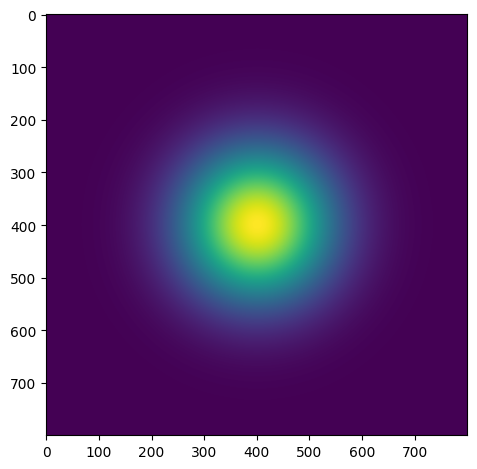

In [8]:
#plot
plt.imshow(z.cpu().numpy())#Updated! 
#GPU to CPU #tensor to numpy arrray
plt.tight_layout()
plt.show()

用 PyTorch 计算 二维高斯分布，然后把结果转回 NumPy，最后用 Matplotlib 把它画出来

### 1.2

Generate a Python script to plot a 2D Gaussian function using Numpy and Matplotlib.

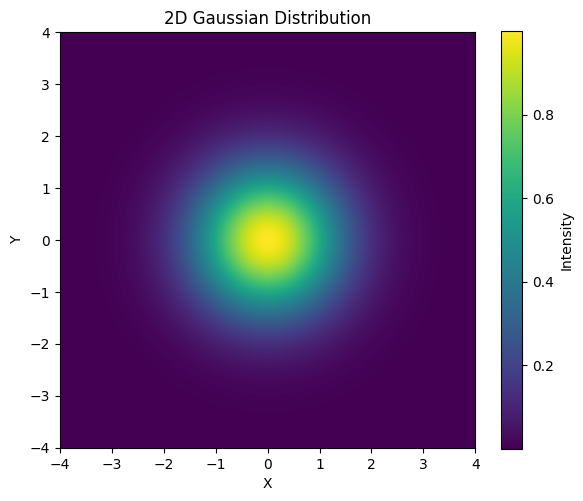

In [9]:
#provided by chatgpt
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the Gaussian
mu_x, mu_y = 0, 0        # Mean (center of the Gaussian)
sigma_x, sigma_y = 1, 1  # Standard deviations

# Create a grid of (x, y) points
x = np.linspace(-4, 4, 400)   # range [-4, 4] with 400 points
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)

# Compute the 2D Gaussian function
Z = np.exp(-(((X - mu_x)**2) / (2 * sigma_x**2) + ((Y - mu_y)**2) / (2 * sigma_y**2)))

# Plot the Gaussian as an image
plt.figure(figsize=(6, 5))
plt.imshow(Z, extent=(-4, 4, -4, 4), origin='lower', cmap='viridis')
plt.colorbar(label='Intensity')
plt.title("2D Gaussian Distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()


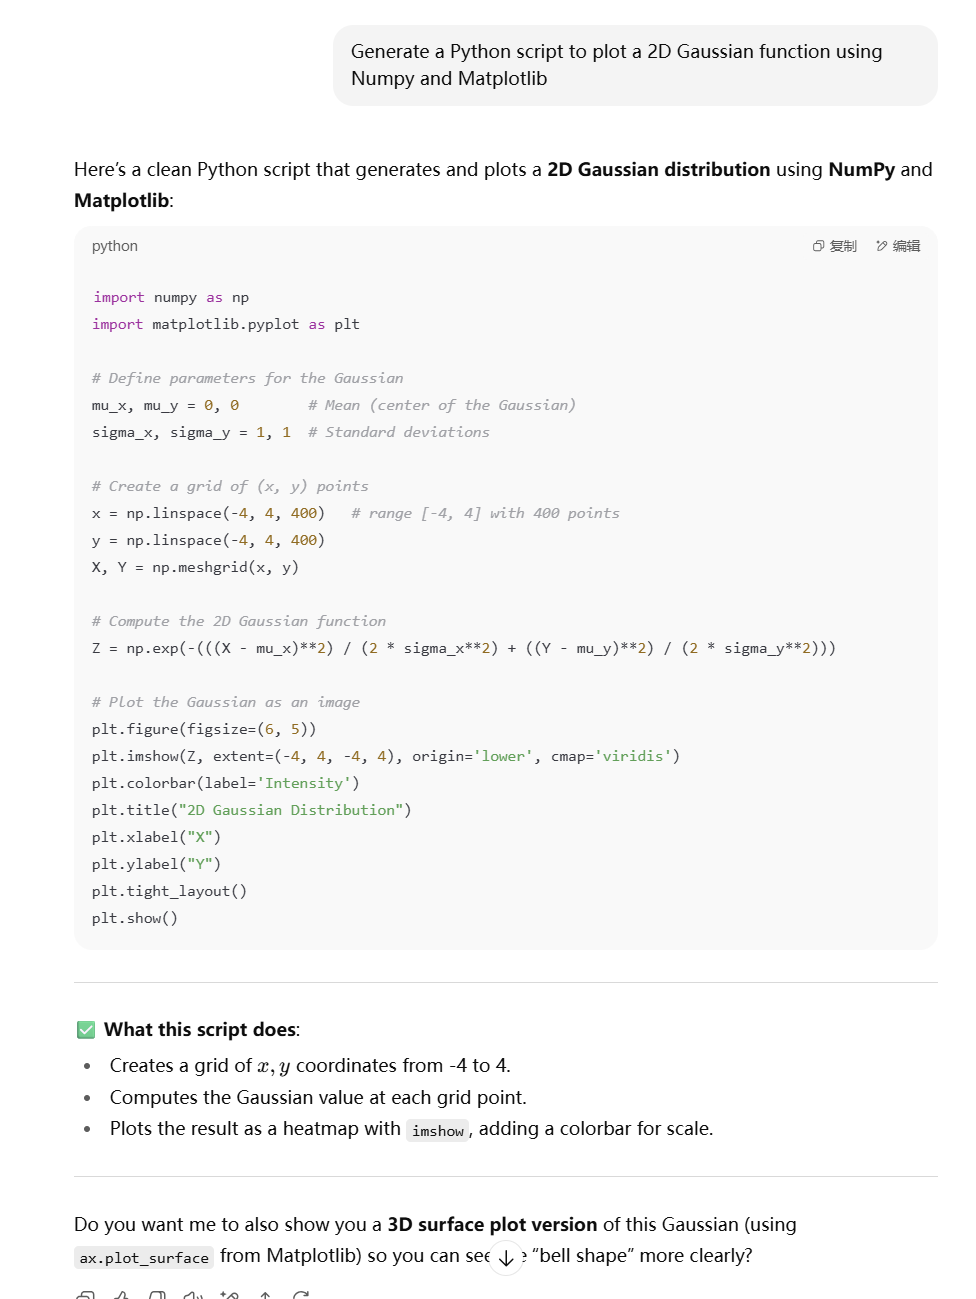

Convert this script to PyTorch and to use its Tensors instead of Numpy.

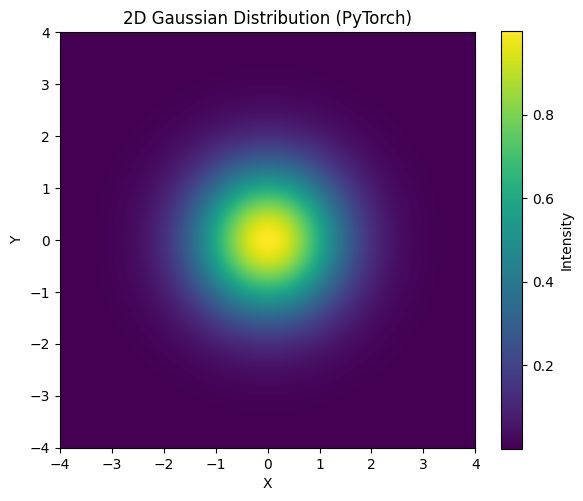

In [10]:
#provided by chatgpt
import torch
import matplotlib.pyplot as plt

# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define parameters for the Gaussian
mu_x, mu_y = 0.0, 0.0
sigma_x, sigma_y = 1.0, 1.0

# Create a grid of (x, y) points using PyTorch
x = torch.linspace(-4.0, 4.0, 400, device=device)
y = torch.linspace(-4.0, 4.0, 400, device=device)
X, Y = torch.meshgrid(x, y, indexing='ij')  # same as np.meshgrid

# Compute the 2D Gaussian function
Z = torch.exp(-(((X - mu_x)**2) / (2 * sigma_x**2) + ((Y - mu_y)**2) / (2 * sigma_y**2)))

# Move the result back to CPU for plotting with Matplotlib
Z_cpu = Z.cpu().numpy()

# Plot the Gaussian as an image
plt.figure(figsize=(6, 5))
plt.imshow(Z_cpu, extent=(-4, 4, -4, 4), origin='lower', cmap='viridis')
plt.colorbar(label='Intensity')
plt.title("2D Gaussian Distribution (PyTorch)")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()


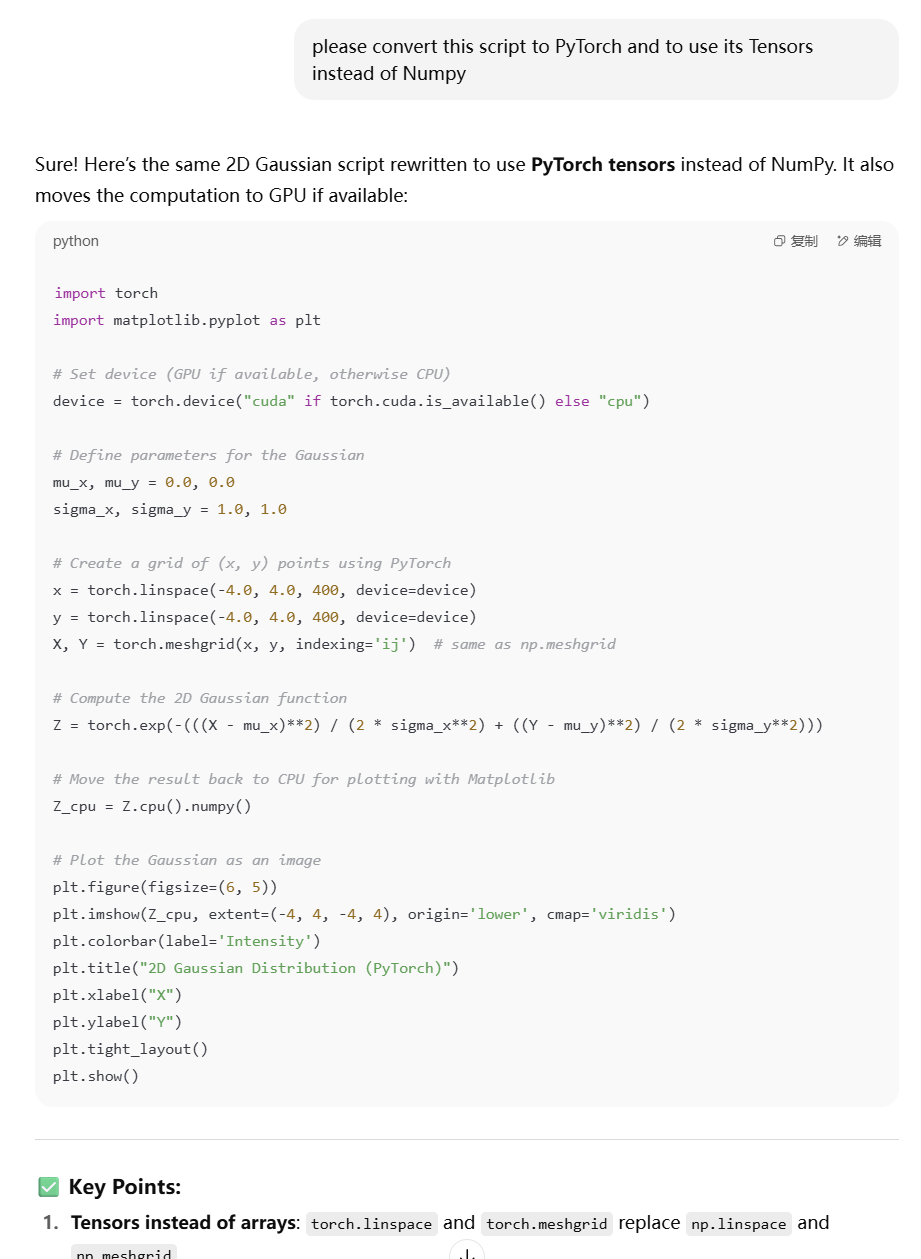

### 1.3

Change the Gaussian function into a 2D sine or cosine function

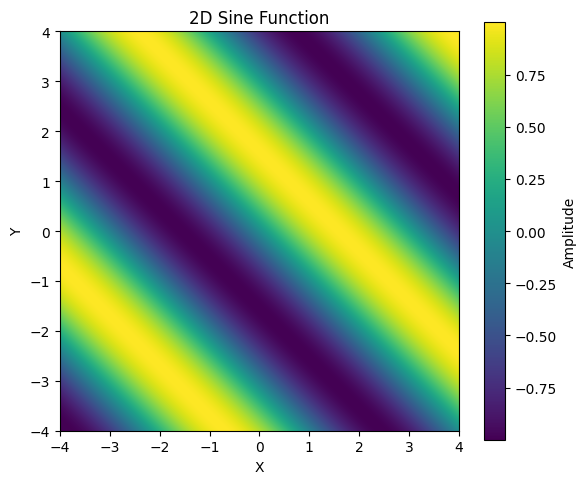

In [11]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)

# Define a 2D sine function
# frequency: n*X + n*Y
z = torch.sin(x + y)

# Move the result to CPU
z_cpu = z.cpu().numpy()

# Plot the 2D sine function
plt.figure(figsize=(6, 5))
plt.imshow(z_cpu, extent=(-4, 4, -4, 4), origin='lower', cmap='viridis')
plt.colorbar(label='Amplitude')
plt.title("2D Sine Function")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

What do you get when you multiply both the Gaussian and the sine/cosine function together and visualise it?

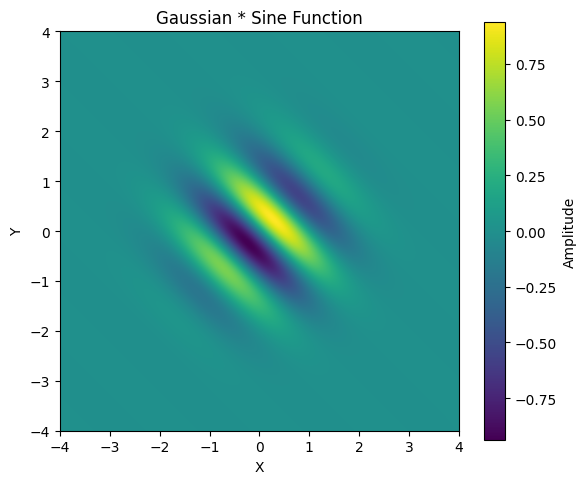

In [12]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)

# Define a 2D sine function multiplied by a Gaussian
z = torch.sin(3*x + 3*y) * torch.exp(-(x**2 + y**2) / 2.0)

# Move the result to CPU
z_cpu = z.cpu().numpy()

# Plot the 2D Gaussian * Sine Function
plt.figure(figsize=(6, 5))
plt.imshow(z_cpu, extent=(-4, 4, -4, 4), origin='lower', cmap='viridis')
plt.colorbar(label='Amplitude')
plt.title("Gaussian * Sine Function")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

### 2.1

Mandelbrot 集是复平面上的一个分形集合。  
核心思想是：对于每个复数点，从0开始，不断迭代  
如果 |c| < 1 且不断迭代后 zs 趋向有限值 → 收敛 → 在图像中标黑色。  
如果 |c| > 1 或迭代增长很快 → 发散 → 根据发散速度选择颜色。  

1. 生成复平面网格

   * 创建 x、y 坐标
   * X + iY 构造复数张量
2. 迭代计算

   * 初始化 z = 0
   * 循环执行 z = z**2 + c
   * 同时记录每个点的迭代次数或“逃逸次数”
3. 生成图像

   * 收敛的点用黑色
   * 发散的点根据迭代次数映射颜色
   * 使用 matplotlib.pyplot.imshow 显示

总结：  
compute which points in the complex plane converge when repeatedly squared or diverge (tend to infinity).  
用迭代判断复数点是否发散  
发散的点根据迭代次数映射颜色  
收敛的点显示黑色  
每个点都是“测试”它会不会无限增长的实验  

C:\Users\gaoru\AppData\Local\Temp\ipykernel_26276\492780214.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


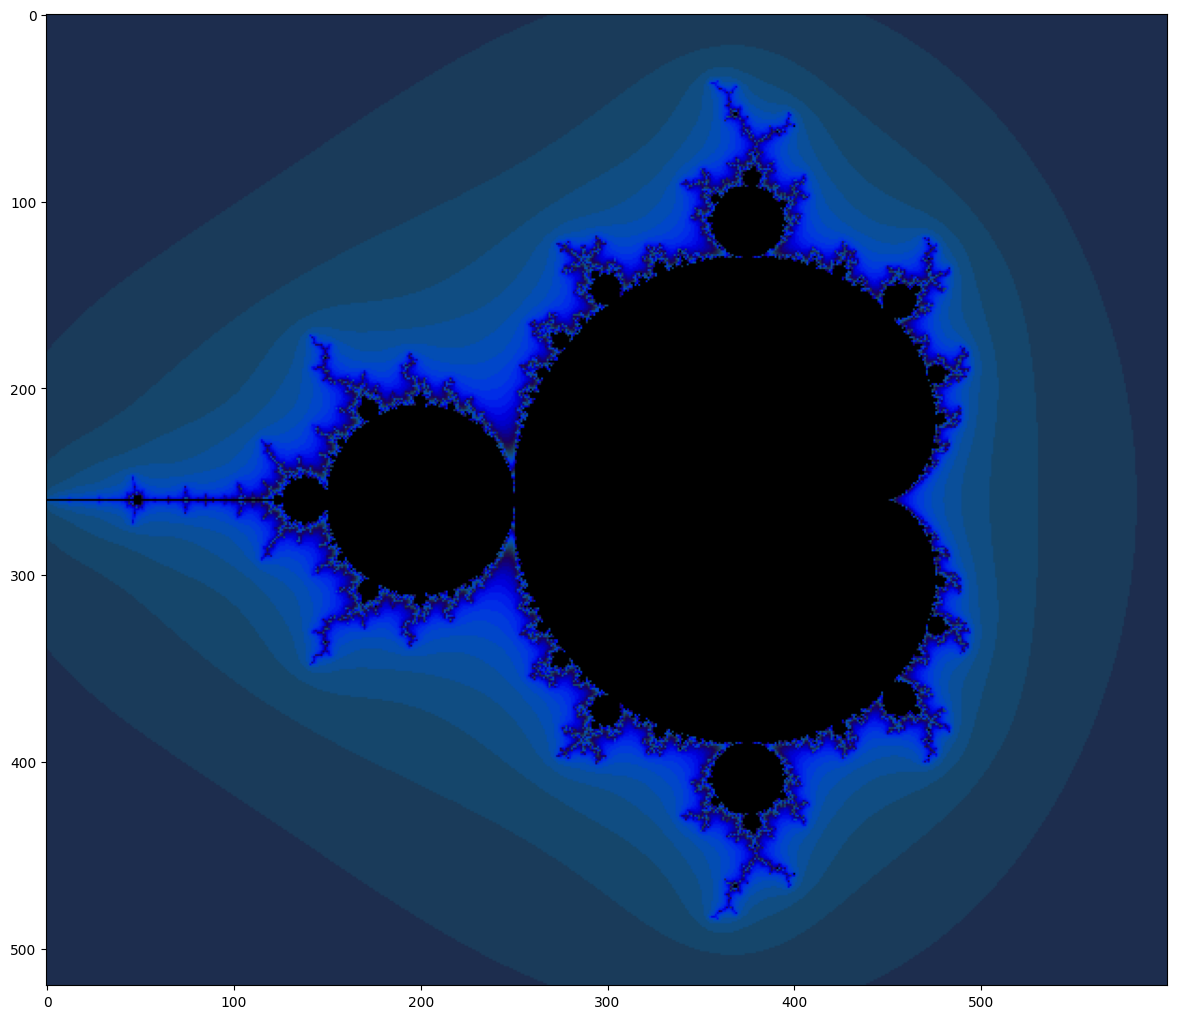

In [13]:
import torch
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2] 
#in the complex plane z
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
#a variable tensor
#Complex number tensor: x+i*y
z = torch.complex(x, y) #important! 
zs = z.clone() #Updated! #a copy of z for iterative updates
#a tensor of the same shape as z and initialized with zero
#keep track of the eventual result (a surrogate for the rate of divergence) as n
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + z
    #Have we diverged with this new value? check whether it has converged or not
    not_diverged = torch.abs(zs_) < 4.0 #bool tensor #True 1=not diverged
    #Update variables to compute
    #the number of times each point remains not_diverged in 200 iterations
    ns += not_diverged #if not diverged,+1
    zs = zs_ #updates

#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a): #the number of times each point remains not_diverged
    #Display an array of iteration counts as a colorful picture of a fractal.
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1]) #2*3.14 Map the number of iterations to the radians #(height, width, 1)
    img = np.concatenate([10+20*np.cos(a_cyclic), #R
    30+50*np.sin(a_cyclic), #G
    155-80*np.cos(a_cyclic)], 2) #B
    img[a==a.max()] = 0 #set the maximum number of iteration to black 
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy())) #GPU to CPU #tensor to numpy arrray
plt.tight_layout(pad=0)
plt.show()

### 2.2

Please generate the Mandelbrot set implemented in PyTorch and that runs on the GPU

Using device: cuda


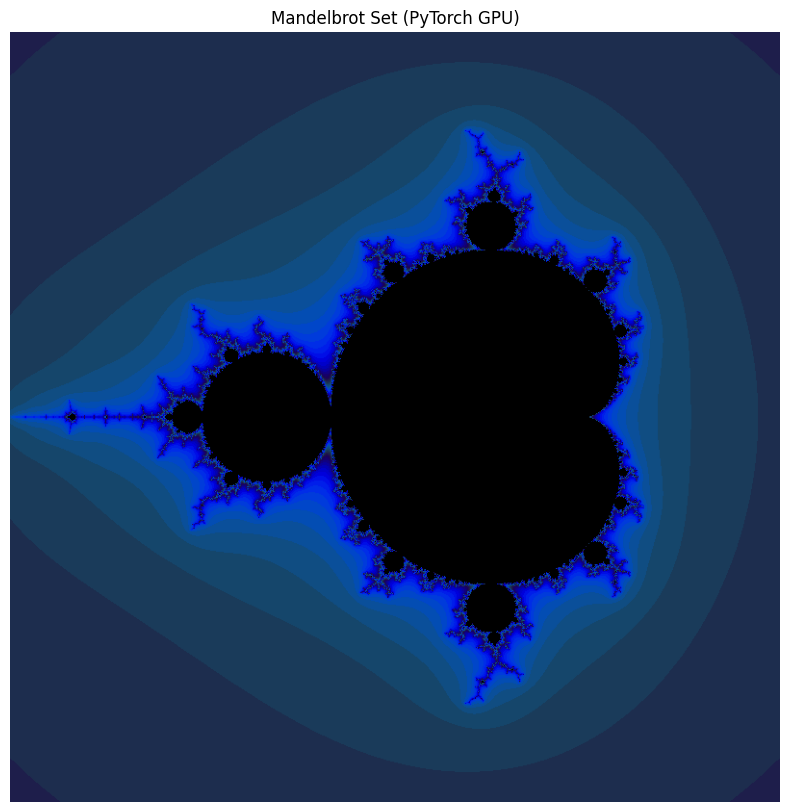

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Device configuration
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --------------------------
# Mandelbrot parameters
# --------------------------
width, height = 800, 800      # image resolution
max_iter = 200                # maximum iterations
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5

# --------------------------
# Generate complex plane grid
# --------------------------
x = torch.linspace(x_min, x_max, width, device=device)
y = torch.linspace(y_min, y_max, height, device=device)
X, Y = torch.meshgrid(x, y, indexing='ij')
z = torch.complex(X, Y)        # initial complex points (c)
zs = z.clone()                 # current iteration z_n
ns = torch.zeros_like(z, dtype=torch.int32)  # counts of non-diverged iterations

# --------------------------
# Mandelbrot iteration
# --------------------------
for i in range(max_iter):
    zs_ = zs * zs + z                     # z_{n+1} = z_n^2 + c
    not_diverged = torch.abs(zs_) < 4.0   # check which points haven't diverged
    ns += not_diverged                     # accumulate iteration counts
    zs = zs_                               # update z_n

# --------------------------
# Function to map iteration counts to RGB colors
# --------------------------
def processFractal(a):
    """Convert iteration counts array into a colorful fractal image."""
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([
        10 + 20 * np.cos(a_cyclic),
        30 + 50 * np.sin(a_cyclic),
        155 - 80 * np.cos(a_cyclic)
    ], 2)
    img[a == a.max()] = 0  # Mandelbrot points colored black
    img = np.uint8(np.clip(img, 0, 255))
    return img

# --------------------------
# Move to CPU and plot
# --------------------------
ns_cpu = ns.cpu().numpy()
plt.figure(figsize=(10,10))
plt.imshow(processFractal(ns_cpu.T))
plt.axis('off')
plt.title("Mandelbrot Set (PyTorch GPU)")
plt.show()

Using device: cpu


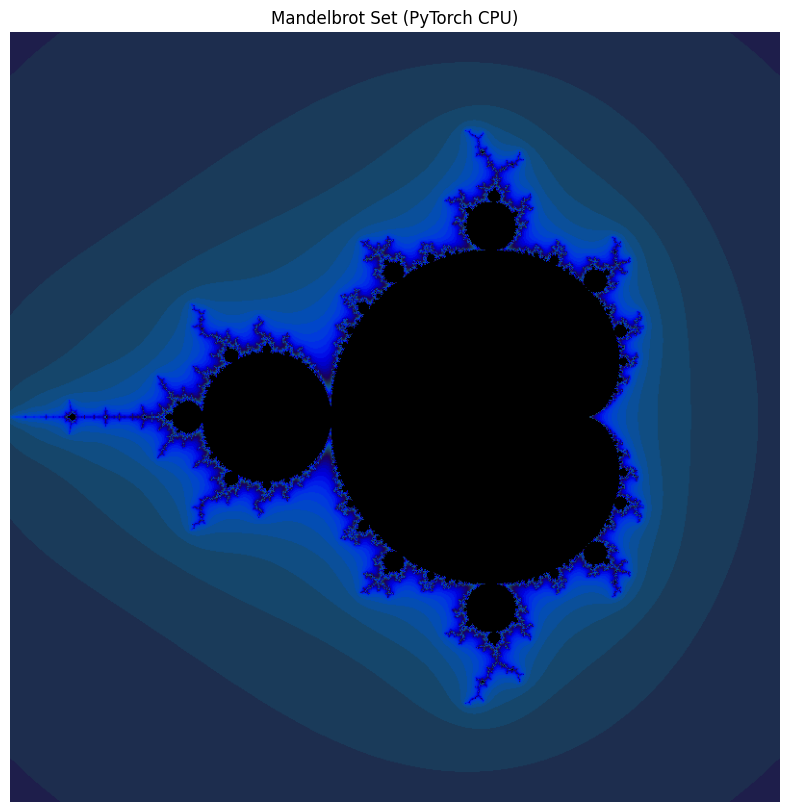

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Device configuration
# --------------------------
device = torch.device("cpu") #use CPU
print(f"Using device: {device}")

# --------------------------
# Mandelbrot parameters
# --------------------------
width, height = 800, 800      # image resolution
max_iter = 200                # maximum iterations
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5

# --------------------------
# Generate complex plane grid
# --------------------------
x = torch.linspace(x_min, x_max, width, device=device)
y = torch.linspace(y_min, y_max, height, device=device)
X, Y = torch.meshgrid(x, y, indexing='ij')
z = torch.complex(X, Y)        # initial complex points (c)
zs = z.clone()                 # current iteration z_n
ns = torch.zeros_like(z, dtype=torch.int32)  # counts of non-diverged iterations

# --------------------------
# Mandelbrot iteration
# --------------------------
for i in range(max_iter):
    zs_ = zs * zs + z                     # z_{n+1} = z_n^2 + c
    not_diverged = torch.abs(zs_) < 4.0   # check which points haven't diverged
    ns += not_diverged                     # accumulate iteration counts
    zs = zs_                               # update z_n

# --------------------------
# Function to map iteration counts to RGB colors
# --------------------------
def processFractal(a):
    """Convert iteration counts array into a colorful fractal image."""
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([
        10 + 20 * np.cos(a_cyclic),
        30 + 50 * np.sin(a_cyclic),
        155 - 80 * np.cos(a_cyclic)
    ], 2)
    img[a == a.max()] = 0  # Mandelbrot points colored black
    img = np.uint8(np.clip(img, 0, 255))
    return img

# --------------------------
# Move to CPU and plot
# --------------------------
ns_cpu = ns.cpu().numpy()
plt.figure(figsize=(10,10))
plt.imshow(processFractal(ns_cpu.T))
plt.axis('off')
plt.title("Mandelbrot Set (PyTorch CPU)")
plt.show()

The script generated by chatGPT successfully implements the Mandelbrot set. It runs fast and allows fast rendering. The execution time is similar to the script provided in the task sheet.  Compared to running the same script on the CPU, the GPU version is faster. 

### 2.3

High resolution computation of the set by decreasing the mgrid spacing and zooming to another
part of the Mandelbrot set and compute the image for it. This may increase the computation time significantly, so choose a value that balances quality of the image and time spent.

C:\Users\gaoru\AppData\Local\Temp\ipykernel_26276\901906609.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


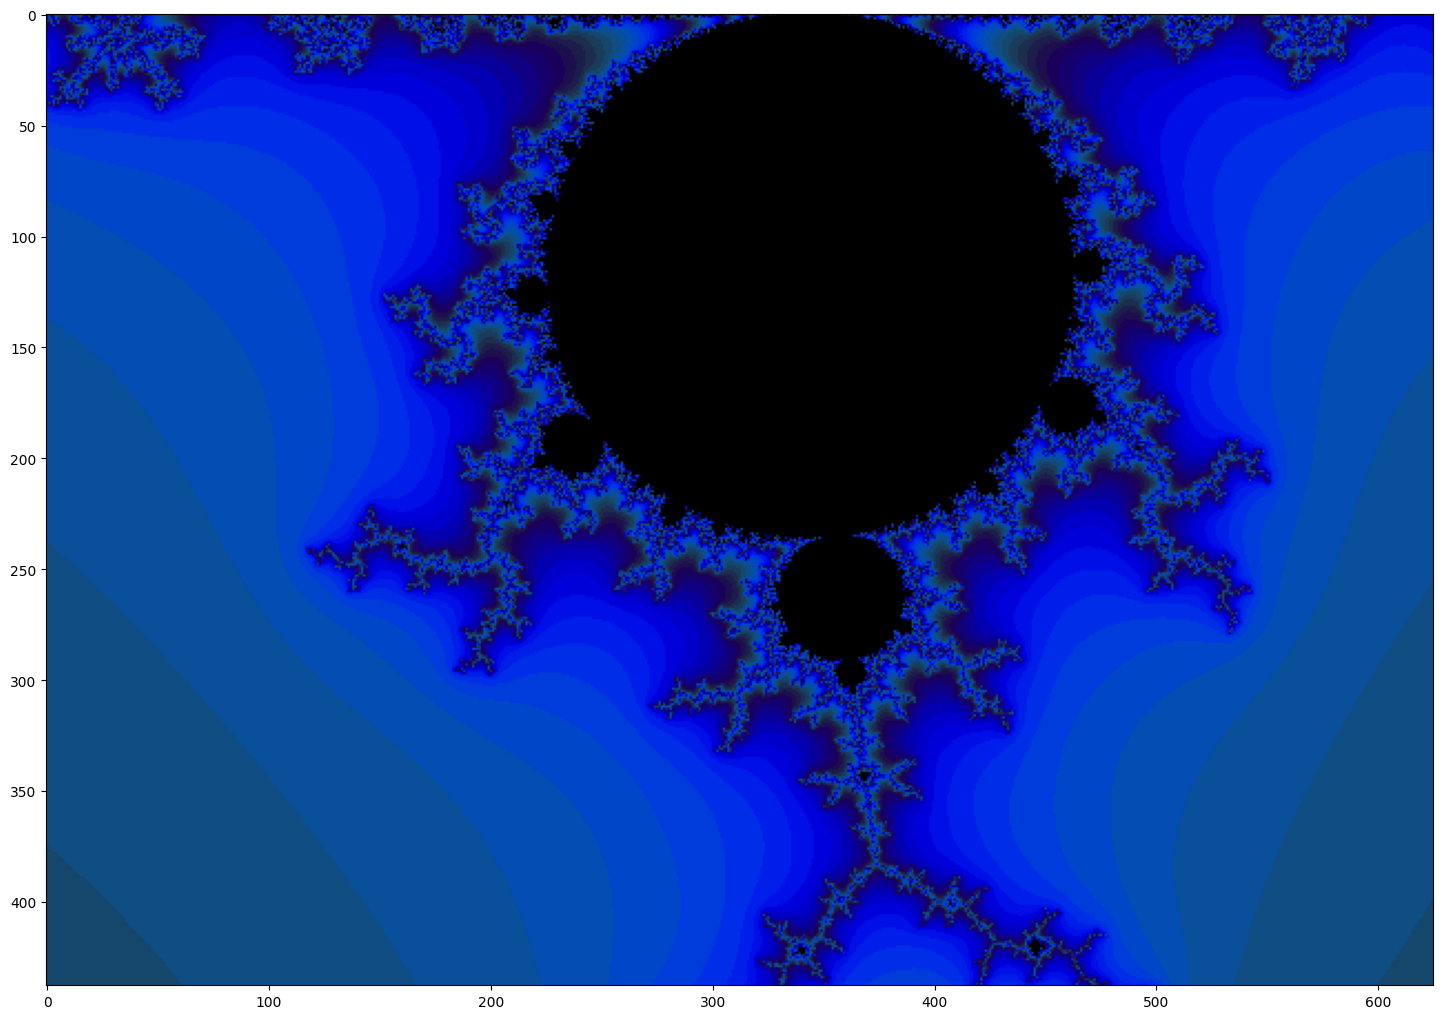

In [ ]:
import torch
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2] 
#in the complex plane z
#Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Y, X = np.mgrid[0.65:1:0.0008, -0.4:0.1:0.0008]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
#a variable tensor
#Complex number tensor: x+i*y
z = torch.complex(x, y) #important! 
zs = z.clone() #Updated! #a copy of z for iterative updates
#a tensor of the same shape as z and initialized with zero
#keep track of the eventual result (a surrogate for the rate of divergence) as n
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + z
    #Have we diverged with this new value? check whether it has converged or not
    not_diverged = torch.abs(zs_) < 4.0 #bool tensor #True 1=not diverged
    #Update variables to compute
    #the number of times each point remains not_diverged in 200 iterations
    ns += not_diverged #if not diverged,+1
    zs = zs_ #updates

#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a): #the number of times each point remains not_diverged
    #Display an array of iteration counts as a colorful picture of a fractal.
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1]) #2*3.14 Map the number of iterations to the radians #(height, width, 1)
    img = np.concatenate([10+20*np.cos(a_cyclic), #R
    30+50*np.sin(a_cyclic), #G
    155-80*np.cos(a_cyclic)], 2) #B
    img[a==a.max()] = 0 #set the maximum number of iteration to black 
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy())) #GPU to CPU #tensor to numpy arrray
plt.tight_layout(pad=0)
plt.show()

Modify the code so to show a Julia set rather than the Mandelbrot set.

C:\Users\gaoru\AppData\Local\Temp\ipykernel_26276\1521751837.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


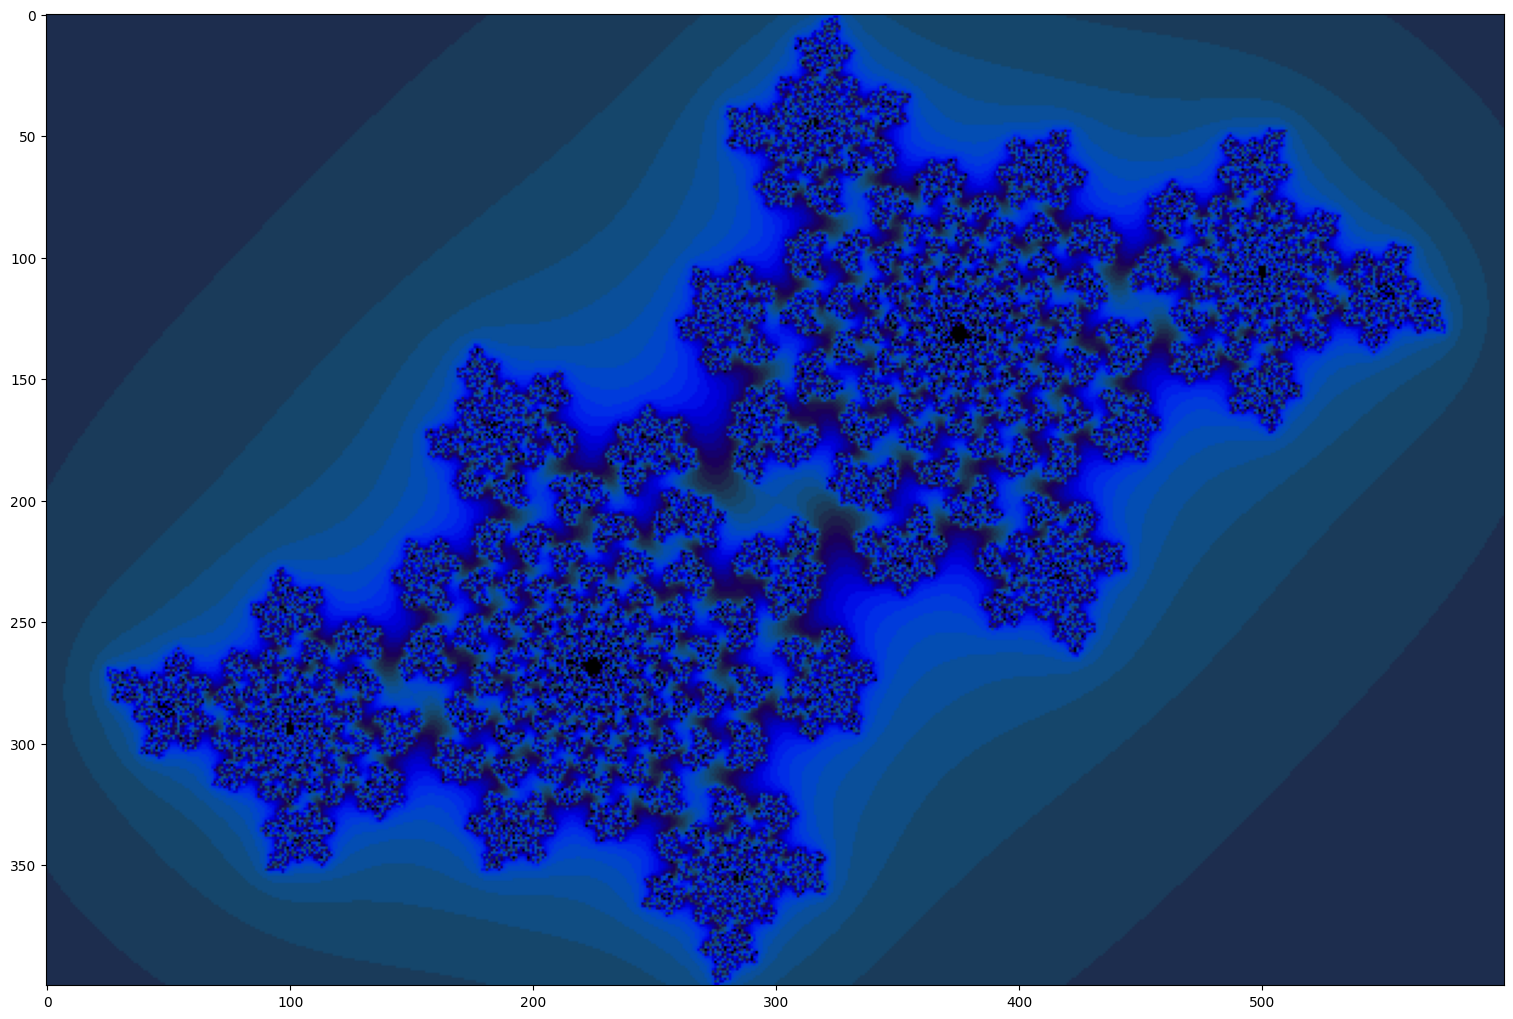

In [50]:
import torch
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
# grid for computing image, subdivide the space
Y, X = np.mgrid[-1:1:0.005, -1.5:1.5:0.005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#a complex number
c = torch.complex(torch.tensor(-0.7), torch.tensor(0.27015))  #c=a+b*i (a,b)
c = torch.complex(torch.tensor(0.355), torch.tensor(0.355))  
c = torch.complex(torch.tensor(-0.4), torch.tensor(0.6))  
#c = torch.complex(torch.tensor(0.123), torch.tensor(0.377))  
c = c.to(device)

#Julia Set
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + c
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    #Update variables to compute
    ns += not_diverged
    zs = zs_

#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
    #Display an array of iteration counts as a colorful picture of a fractal.
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()